**importing libraries and dataet**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df=pd.read_csv('HR_data.csv')
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [3]:
df.isnull().sum()

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
SLNO                           8995 non-null int64
Candidate.Ref                  8995 non-null int64
DOJ.Extended                   8995 non-null object
Duration.to.accept.offer       8995 non-null int64
Notice.period                  8995 non-null int64
Offered.band                   8995 non-null object
Pecent.hike.expected.in.CTC    8995 non-null float64
Percent.hike.offered.in.CTC    8995 non-null float64
Percent.difference.CTC         8995 non-null float64
Joining.Bonus                  8995 non-null object
Candidate.relocate.actual      8995 non-null object
Gender                         8995 non-null object
Candidate.Source               8995 non-null object
Rex.in.Yrs                     8995 non-null int64
LOB                            8995 non-null object
Location                       8995 non-null object
Age                            8995 non-null int64
Status      

# Finding the co-realtion

In [5]:
df.corr()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
SLNO,1.000000,0.898788,-0.030136,-0.098491,0.048984,0.018101,-0.043523,-0.061839,0.318025
Candidate.Ref,0.898788,1.000000,-0.030752,-0.120810,0.077124,0.044828,-0.016667,-0.047440,0.306520
Duration.to.accept.offer,-0.030136,-0.030752,1.000000,0.363760,0.018821,0.007307,-0.009395,0.113951,0.020131
Notice.period,-0.098491,-0.120810,0.363760,1.000000,-0.005262,-0.013458,-0.015067,0.181786,-0.004967
Pecent.hike.expected.in.CTC,0.048984,0.077124,0.018821,-0.005262,1.000000,0.668594,-0.161501,-0.217391,-0.137705
Percent.hike.offered.in.CTC,0.018101,0.044828,0.007307,-0.013458,0.668594,1.000000,0.598779,-0.110243,-0.080010
Percent.difference.CTC,-0.043523,-0.016667,-0.009395,-0.015067,-0.161501,0.598779,1.000000,0.081547,0.037955
Rex.in.Yrs,-0.061839,-0.047440,0.113951,0.181786,-0.217391,-0.110243,0.081547,1.000000,0.568228
Age,0.318025,0.306520,0.020131,-0.004967,-0.137705,-0.080010,0.037955,0.568228,1.000000


# Adding Dummies

In [6]:
df_dum=pd.get_dummies(df,drop_first=True)

In [7]:
df['Status'].value_counts()

Joined        7313
Not Joined    1682
Name: Status, dtype: int64

In [8]:
df.replace(['Joined','Not Joined'],[0,1],inplace=True)

In [9]:
x=df.iloc[:,:-1] #independent
y=df.iloc[:,-1] #dependent

# dropping the high co_relaion variables

In [ ]:
df.drop(['SLNO','Candidate.Ref','Pecent.hike.expected.in.CTC','Percent.hike.offered.in.CTC'],axis=1,inplace=True)

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int64

In [12]:
xd=pd.get_dummies(x,drop_first=True)

In [13]:
import statsmodels.api as sm

In [14]:
model=sm.GLM(y,xd).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Status   No. Observations:                 8995
Model:                            GLM   Df Residuals:                     8959
Model Family:                Gaussian   Df Model:                           35
Link Function:               identity   Scale:                         0.13752
Method:                          IRLS   Log-Likelihood:                -3822.3
Date:                Wed, 23 Oct 2019   Deviance:                       1232.0
Time:                        08:00:25   Pearson chi2:                 1.23e+03
No. Iterations:                     3   Covariance Type:             nonrobust
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
SLNO                                -4.46e-06    2.7e-06     -1.649      0.099   -9

# Feature engineering

In [15]:
features=model.pvalues.sort_values(ascending=True)
features[features<0.025]

Candidate.relocate.actual_Yes         4.476720e-74
Notice.period                         3.569638e-53
Candidate.Source_Employee Referral    6.950800e-13
Location_Chennai                      2.428081e-12
Location_Bangalore                    1.836981e-11
Location_Hyderabad                    3.234541e-10
Location_Noida                        7.290371e-10
Location_Kolkata                      1.463496e-09
Location_Gurgaon                      3.686728e-09
Location_Mumbai                       9.206258e-08
Candidate.Source_Direct               1.851964e-07
Offered.band_E1                       3.757927e-07
LOB_INFRA                             6.895900e-07
Location_Pune                         1.194870e-06
Offered.band_E3                       1.972042e-05
Offered.band_E2                       3.917096e-05
DOJ.Extended_Yes                      6.764918e-04
Age                                   1.342747e-03
LOB_ETS                               2.401145e-03
LOB_MMS                        

In [16]:
selected_features=list(features[features<0.025].index) + ['Status_Not Joined']
a=df_dum[selected_features]

In [17]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 24 columns):
Candidate.relocate.actual_Yes         8995 non-null uint8
Notice.period                         8995 non-null int64
Candidate.Source_Employee Referral    8995 non-null uint8
Location_Chennai                      8995 non-null uint8
Location_Bangalore                    8995 non-null uint8
Location_Hyderabad                    8995 non-null uint8
Location_Noida                        8995 non-null uint8
Location_Kolkata                      8995 non-null uint8
Location_Gurgaon                      8995 non-null uint8
Location_Mumbai                       8995 non-null uint8
Candidate.Source_Direct               8995 non-null uint8
Offered.band_E1                       8995 non-null uint8
LOB_INFRA                             8995 non-null uint8
Location_Pune                         8995 non-null uint8
Offered.band_E3                       8995 non-null uint8
Offered.band_E2        

In [18]:
x=a.iloc[:,:-1]
y=a.iloc[:,-1]

# Building the logistic reggression model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model1=LogisticRegression()

In [22]:
import innomatic

In [23]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7196, 23), (1799, 23), (7196,), (1799,))

In [25]:
model1=LogisticRegression()

In [26]:
model1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred=model1.predict(x_test)
y_pred_prob=model1.predict_proba(x_test)[:,1]

** Kappa score **
** Confusion matrix **
** Auc curve **

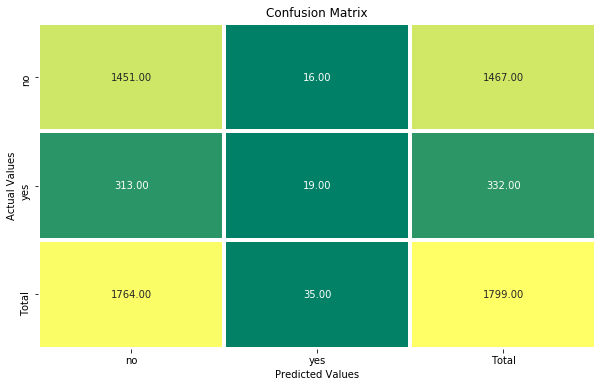

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1467
           1       0.54      0.06      0.10       332

    accuracy                           0.82      1799
   macro avg       0.68      0.52      0.50      1799
weighted avg       0.77      0.82      0.75      1799


************************************Kappa Score************************************


Kappa Score = 0.0708359432521235

******************************Area Under Curve Score******************************


AUC Score = 0.5231611517645223
Number of probabilities to build ROC = 677


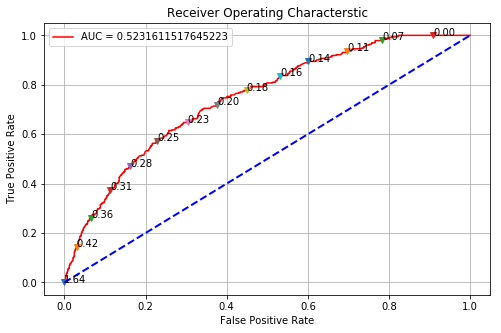

In [30]:
innomatic.classification_metric(y_test,y_pred,y_pred_prob,['no','yes'],n=50,verbose=True)

# Balancing data using SMOTE

In [31]:
import imblearn
from imblearn.over_sampling import SMOTE

In [32]:
x_resample,y_resample=SMOTE(k_neighbors=7).fit_resample(x,y)

1    7313
0    7313
dtype: int64

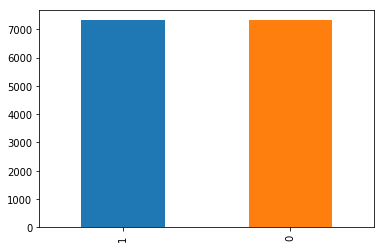

In [33]:
pd.Series(y_resample).value_counts().plot('bar')
pd.Series(y_resample).value_counts()

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11700, 23), (2926, 23), (11700,), (2926,))

In [35]:
model2=LogisticRegression()
model2.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred=model2.predict(x_test)
y_pred_prob=model2.predict_proba(x_test)[:,1]
threshold = 0.3925
y_pred = (y_pred_prob >= threshold).astype(int)

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
def classification_metric(y_test,y_pred,y_prob,label,n=1,verbose=False):
    """
    Note: only for binary classification
    confusionmatrix(y_true,y_pred,labels=['No','Yes'])
    """
    # confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    print('FP-FN Ratio: ',cm[0][1]/cm[1][0])
    row_sum = cm.sum(axis=0)
    cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

    labels = label+['Total']
    plt.figure(figsize=(10,6))
    sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)

    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    cr = classification_report(y_test,y_pred)
    print(cr)
    
    print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    # Kappa score
    kappa = cohen_kappa_score(y_test,y_pred) # Kappa Score
    print('Kappa Score =',kappa)
    
    print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
    # Kappa score
    roc_a = roc_auc_score(y_test,y_pred) # Kappa Score
    print('AUC Score =',roc_a)
    
    # ROC
    plt.figure(figsize=(8,5))
    fpr,tpr, thresh = roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr,'r')
    print('Number of probabilities to build ROC =',len(fpr))
    if verbose == True:
        for i in range(len(thresh)):
            if i%n == 0:
                plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
                plt.plot(fpr[i],tpr[i],'v')


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic')
    plt.legend(['AUC = {}'.format(roc_a)])
    plt.plot([0,1],[0,1],'b--',linewidth=2.0)
    plt.grid()
    plt.show()
    
    
class threshold():
    '''
    Setting up the threshold points
    '''
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:#
            return 0

FP-FN Ratio:  3.269662921348315


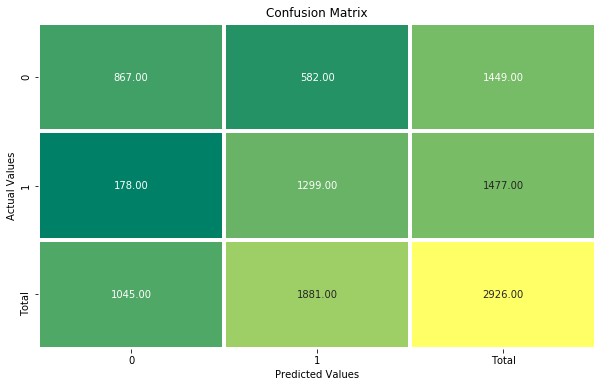

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.83      0.60      0.70      1449
           1       0.69      0.88      0.77      1477

    accuracy                           0.74      2926
   macro avg       0.76      0.74      0.73      2926
weighted avg       0.76      0.74      0.73      2926


************************************Kappa Score************************************


Kappa Score = 0.479095270733379

******************************Area Under Curve Score******************************


AUC Score = 0.7389145643833466
Number of probabilities to build ROC = 1041


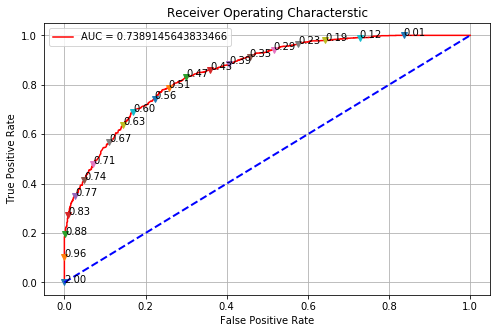

In [38]:
classification_metric(y_test,y_pred,y_pred_prob,['0','1'],n=50,verbose=True)

- from above confusion matrix false postive is three times of false negative